# Challenge 3

In [20]:
# import libraries here
import pandas as pd
import matplotlib.style
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#### Import the titanic file. Name your dataset `titanic`.

In [70]:
titanic = pd.read_csv('./titanic.csv',low_memory=False)
titanic.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes

In [3]:
titanic.dtypes


PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?

*Hint: Use Pandas `select_dtypes`*

In [7]:
# your code here- numerical variable
numerical=titanic.select_dtypes(include=['int64','float64'])
print(f"numerical variables: {list(numerical.columns)}")


numerical variables: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [8]:
categorical=titanic.select_dtypes(include=['object'])
print(f"categorical variables: {list(categorical.columns)}")

categorical variables: ['Name', 'Gender', 'Ticket', 'Cabin', 'Embarked']


#### Set the plot style to `classic` and the figure size to `(12,6)`

*Hint: To set the style you can use `matplotlib.pyplot` functions or seaborn*

In [41]:
plt.figure(figsize=(12,6))
plt.style.use('classic')


<Figure size 960x480 with 0 Axes>

#### Use the appropriate visulalization to show the distribution of the column `Age`

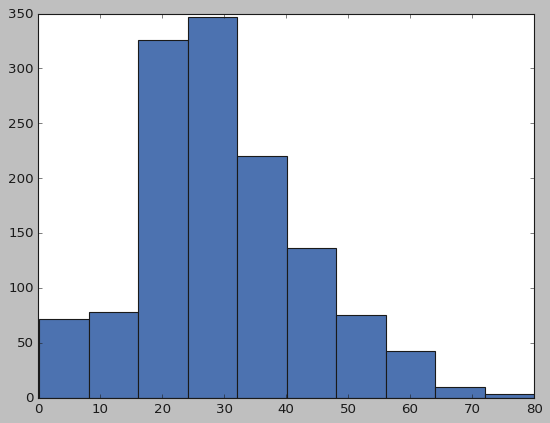

In [42]:
x=titanic["Age"]
plt.hist(x)
plt.show()



#### Use subplots to plot the distribution of the `Age` variable with bins equal to `10`, `20` and `50`.

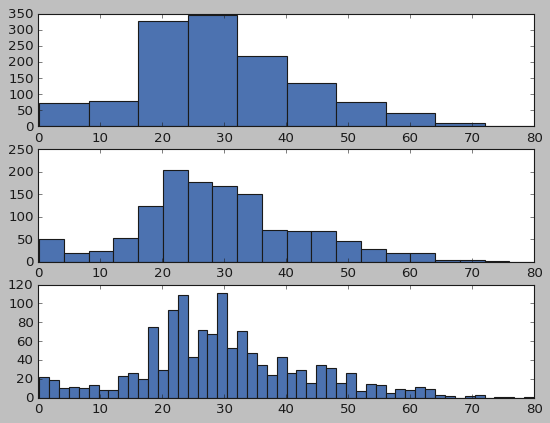

In [43]:
x=titanic["Age"]
f, (ax1, ax2, ax3) = plt.subplots(3, 1, sharey=False)
ax1.hist(x, bins=10)
ax2.hist(x, bins=20)
ax3.hist(x, bins=50)
plt.show()



#### Whether the bin size affects your plot? Why?

The number of bins does affect the plots. More bins equals more and "smaller" boxes to fit the values into. The same value may fall into a different bin if the number of bins is modified, changing the way we visualize the distribution of our data. On the first plot the maximum frequency of ages is found near 30, wheras on the second plot the max frequency is found closer to 20 years.


#### Use seaborn to show the distribution of the column `Age`

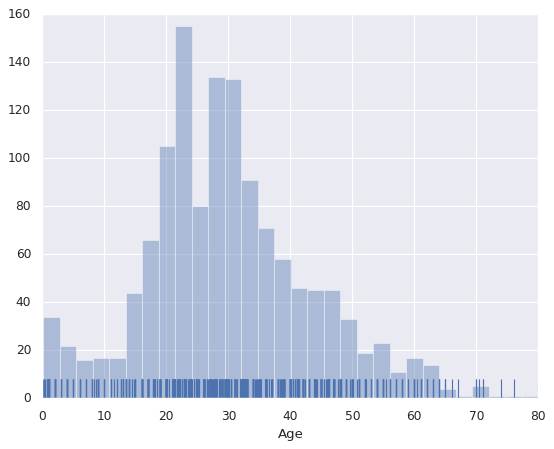

In [45]:
x=titanic["Age"]
sns.set()
sns.distplot(x, kde=False, rug=True)
plt.show()

#### Use the appropriate plot to visualize the column `Gender`. There are 2 ways of doing it. Do it both ways.

*Hint: Use matplotlib and seaborn*

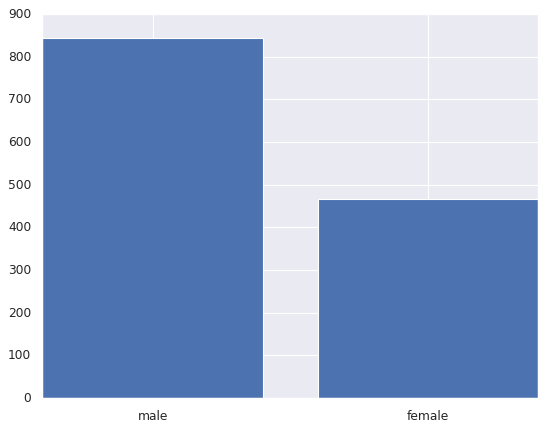

In [53]:
x=titanic["Gender"].value_counts()
plt.figure()
plt.bar(x.index,x)
plt.show()

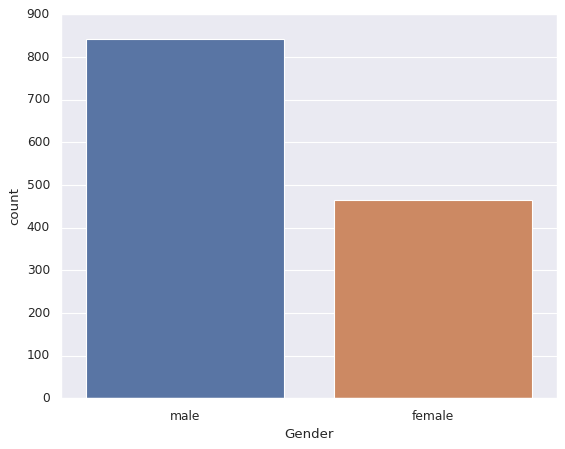

In [74]:
sns.countplot(x="Gender", data=titanic)
plt.show()

#### Use the appropriate plot to visualize the column `Pclass` 


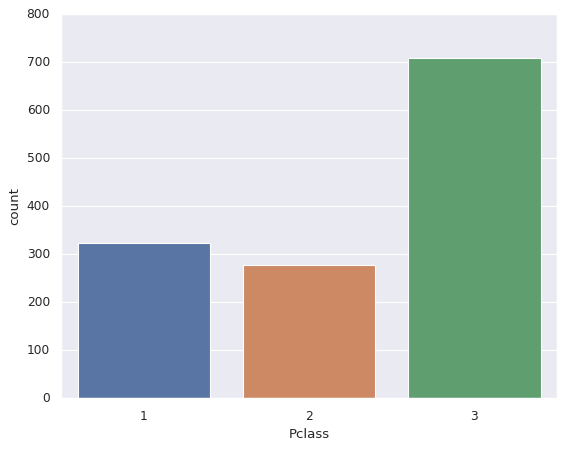

In [75]:
sns.countplot(x="Pclass", data=titanic)
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. Choose the appropriate plot to show below.

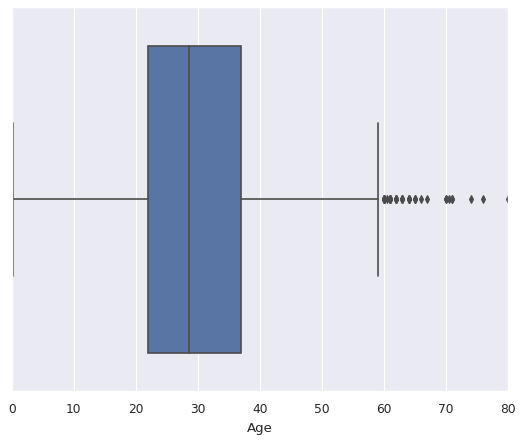

In [76]:
sns.boxplot(x="Age", data=titanic)
plt.show()

#### What does the previous plot tell you about the feature `Age`? Comment.

Q1 is located near 20 years (that means 25% of the sample is below 22-23 years old), the median age is 28-29 years old, Q3 is near 37 years old (50% of our sample is between Q1 and Q3). Q4 is close to 60 years. The small dots would be the outliers.

#### Now in addition to the summary statistics, we also want to visualize the distribution of `Age`. Choose the appropriate plot to sow below.

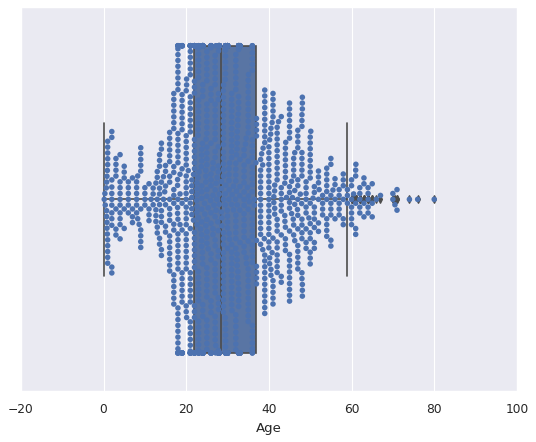

In [78]:
sns.boxplot(x="Age", data=titanic)
sns.swarmplot(x="Age", data=titanic)
plt.show()

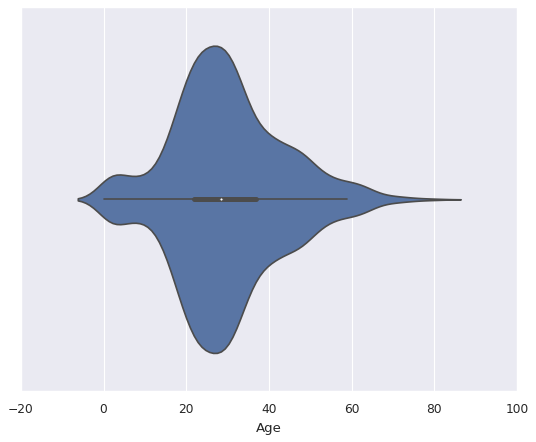

In [81]:
sns.violinplot(x="Age",data=titanic,orient="h")
plt.show()

#### What additional information in the previous plot provide you about the feature `Age`? Comment.

The age distribution seems right skewed or positive-skewed.


#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the appropriate plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.

*Hint: One of the ways involves using Seaborn*

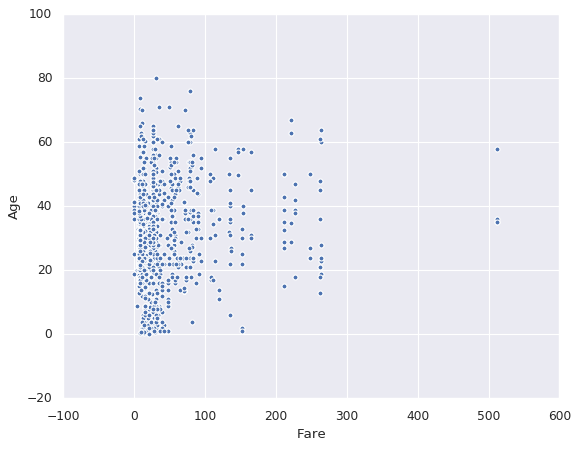

In [84]:
x=titanic["Fare"]
y=titanic["Age"]

plt.scatter(x,y)
plt.xlabel("Fare")
plt.ylabel("Age")
plt.show()


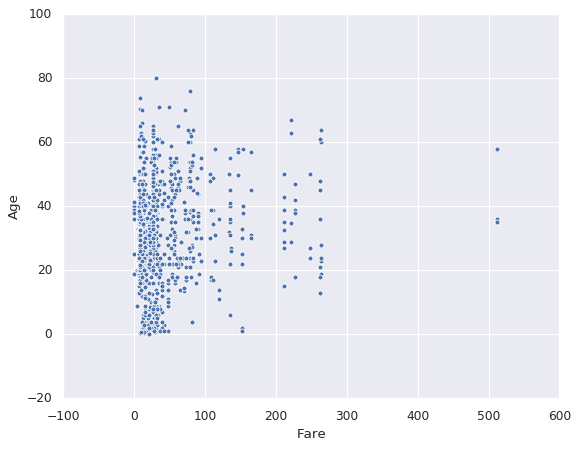

In [85]:
sns.scatterplot(x="Fare",y="Age",data=titanic)
plt.show()


#### Using Seaborn plot the correlation matrix of various features.

*Hint: search how to use `heatmap`*

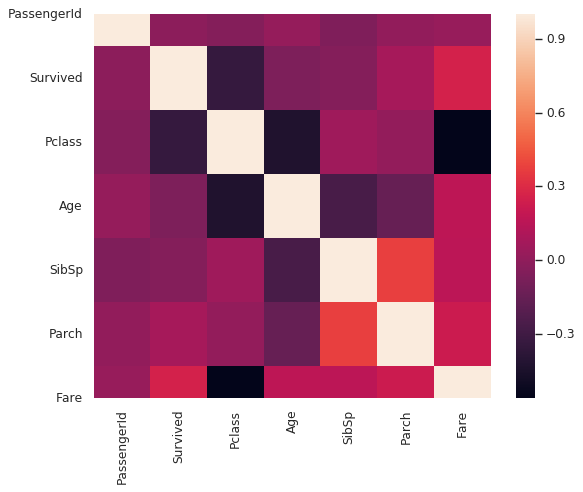

In [92]:
sns.heatmap(titanic.corr())
plt.show()


#### According to the previous plot, what are the most correlated feature? Comment.

The most correlated values are Fare and Pclass, inversely correlated. That is, the higher the fare the lower (better) the class.


#### Use the appropriate plot to display the summary statistics of the `Age` in function of the `Pclass`.

*Hint: use boxplot to display summary statistics of `Age` in relation to each of the discrete values of `Pclass`*

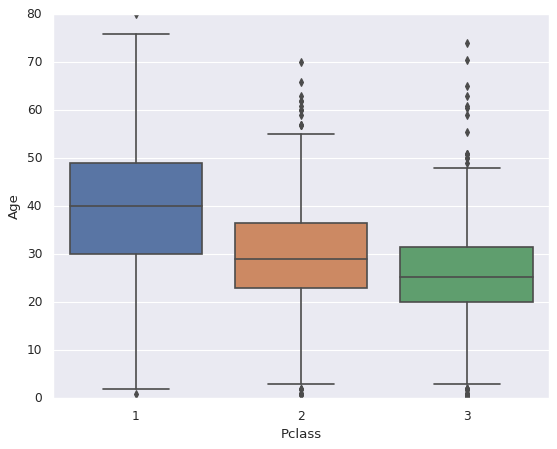

In [99]:
sns.boxplot(x="Pclass", y="Age", data=titanic)


#### Use the appropriate plot to display the distributions of  `Age` in relation to  `Gender`.

*Hint: use Facetgrid to display the distribution of `Age` for each categorical value of `Gender`*

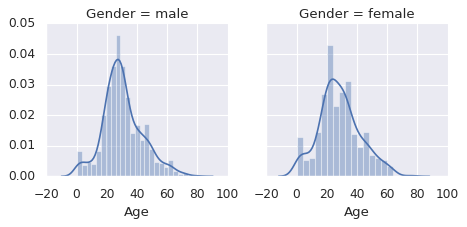

In [113]:
g = sns.FacetGrid(titanic, col="Gender")
g.map(sns.distplot, "Age")
plt.show()


/home/maximiliano/.local/lib/python3.6/site-packages/seaborn/axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


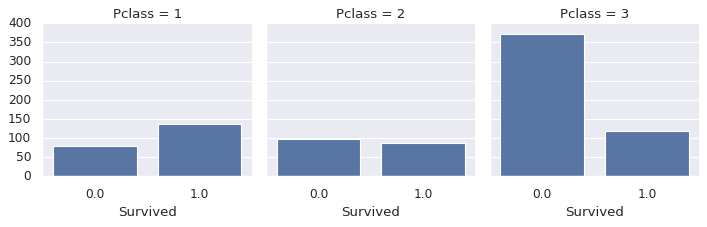

In [114]:
g = sns.FacetGrid(titanic, col="Pclass")
g.map(sns.countplot, "Survived")
plt.show()